# i. Perkenalan

Nama: Sinthiya Kusuma Nagari

Batch: HCK 010

Objective: Memprediksi apakah seorang customer akan berhenti berlangganan dengan provider atau tidak serta mengetahui faktor-faktor penentunya.

# ii. Import Library

In [1]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
from imblearn.under_sampling import ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle
import warnings
warnings.filterwarnings('ignore')


# iii. Data Loading

In [2]:
# membaca data csv
df=pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# menampilkan nama kolom pada dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# summary data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kolom TotalCharges seharusnya integer, maka akan dilakukan analisa lebih lanjut dan perubahan tipe data.

## Cek Data Duplikat

In [5]:
# menjumlahkan data duplikat
df.duplicated().sum()

0

Tidak ada data duplikat

## Cek Missing Value

In [6]:
# menjumlahkan data null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Berdasarkan informasi di atas tidak ada missing value

In [7]:
# mengubah totalcharges menjadi numerik
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# menghitung nilai NaN
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terdapat 11 baris data NaN pada TotalCharges

In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Pada pemeriksaan sebelumnya data NaN tidak terdeteksi karena berupa object

In [9]:
# melakukan drop pada baris yang memuat nilai NaN
df.dropna(inplace=True)

## Cek Cardinality

In [10]:
for i in df:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print(('-')*50)

customerID
7032
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender
2
['Female' 'Male']
--------------------------------------------------
SeniorCitizen
2
[0 1]
--------------------------------------------------
Partner
2
['Yes' 'No']
--------------------------------------------------
Dependents
2
['No' 'Yes']
--------------------------------------------------
tenure
72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
--------------------------------------------------
PhoneService
2
['No' 'Yes']
--------------------------------------------------
MultipleLines
3
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService
3
['DSL' 'Fiber optic' 'No']
------------------------------------------

In [11]:
# melakukan drop pada customerID
df.drop(columns="customerID",inplace=True)

# iv. EDA

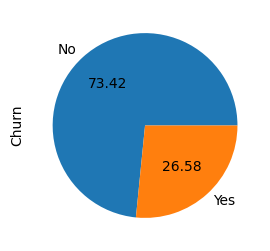

In [12]:
df['Churn'].value_counts().plot(kind='pie', figsize=(3,3), autopct='%.2f')
sns.set_theme(style="darkgrid")

In [13]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Berdasarkan pie chart di atas, data yang tidak churn lebih dominan yaitu sebesar 73.42%, sedangkan untuk data customer yang melakukan churn sebesar 26.5%. Hal ini mengidentifikasikan data imbalance

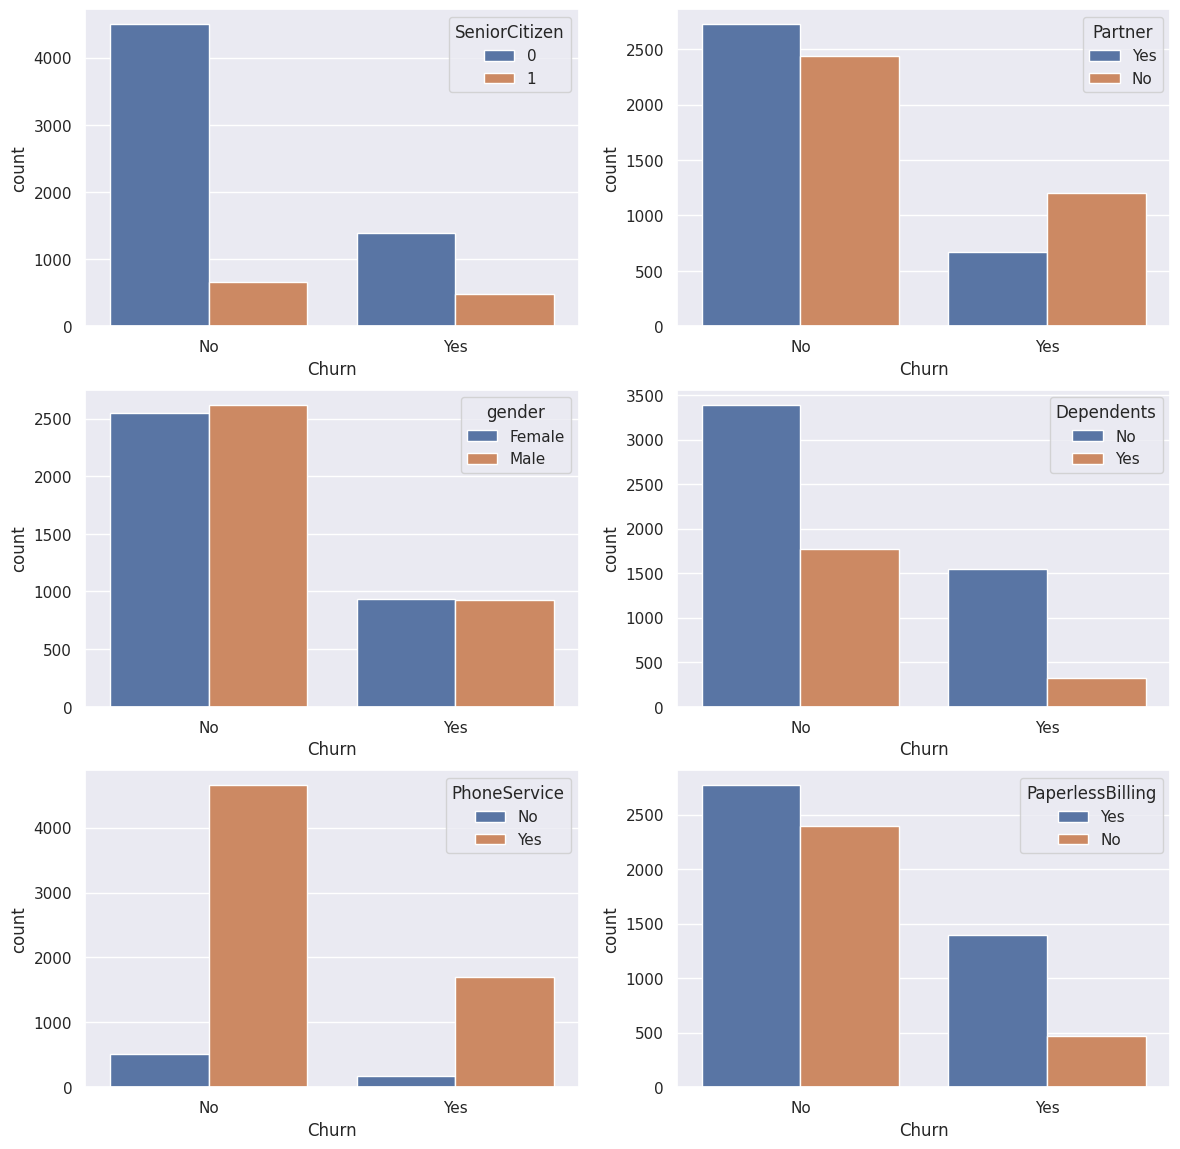

In [14]:
# membuat bar plot pada beberapa variabel kategory
fig,axs=plt.subplots(3,2, figsize=(14,14))
sns.countplot(x='Churn',hue='SeniorCitizen',data=df,ax=axs[0,0])
sns.countplot(x='Churn',hue='Partner',data=df,ax=axs[0,1])
sns.countplot(x='Churn',hue='gender',data=df,ax=axs[1,0])
sns.countplot(x='Churn',hue='Dependents',data=df,ax=axs[1,1])
sns.countplot(x='Churn',hue='PhoneService',data=df,ax=axs[2,0])
sns.countplot(x='Churn',hue='PaperlessBilling',data=df,ax=axs[2,1])
plt.show()

**Insight:**

Berdasarkan bar plot di atas
- Gender: Tidak terdapat pengaruh yang signifikan terhadap churn berdasarkan jenis kelamin.
- Partner: Pelanggan yang memiliki patner cenderung tidak melakukan churn, sedangkan pelanggan yang melakukan churn lebih dominan di antara mereka yang tidak memiliki patner.
- SeniorCitizen: Dari dataset yang diperoleh, pelanggan yang telah menjadi pelanggan lama memiliki jumlah churn dan tidak churn yang relatif mendekati. Namun, masih dominan bahwa pelanggan lama cenderung tidak melakukan churn. Ini menjadi perhatian penting agar pelanggan lama tetap berlangganan dengan memberikan insentif seperti program loyalitas. Sementara itu, pelanggan baru cenderung memperpanjang layanan mereka.
- Dependents: Mayoritas pelanggan yang memiliki tanggungan tidak melakukan churn.
- PhoneService: Pelanggan yang tidak melakukan churn didominasi oleh mereka yang menerima layanan telepon dari perusahaan. Namun, pelanggan yang melakukan churn juga didominasi oleh mereka yang menerima layanan telepon dari perusahaan.
- PaperlessBilling: Pelanggan yang tidak melakukan churn didominasi oleh mereka yang menggunakan paperless billing, namun pelanggan yang tidak memilikinya juga cenderung tidak melakukan churn. Meskipun begitu, dominasi tetap pada pelanggan yang menggunakan paperless billing.


 'tenure',
       'PhoneService', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges',

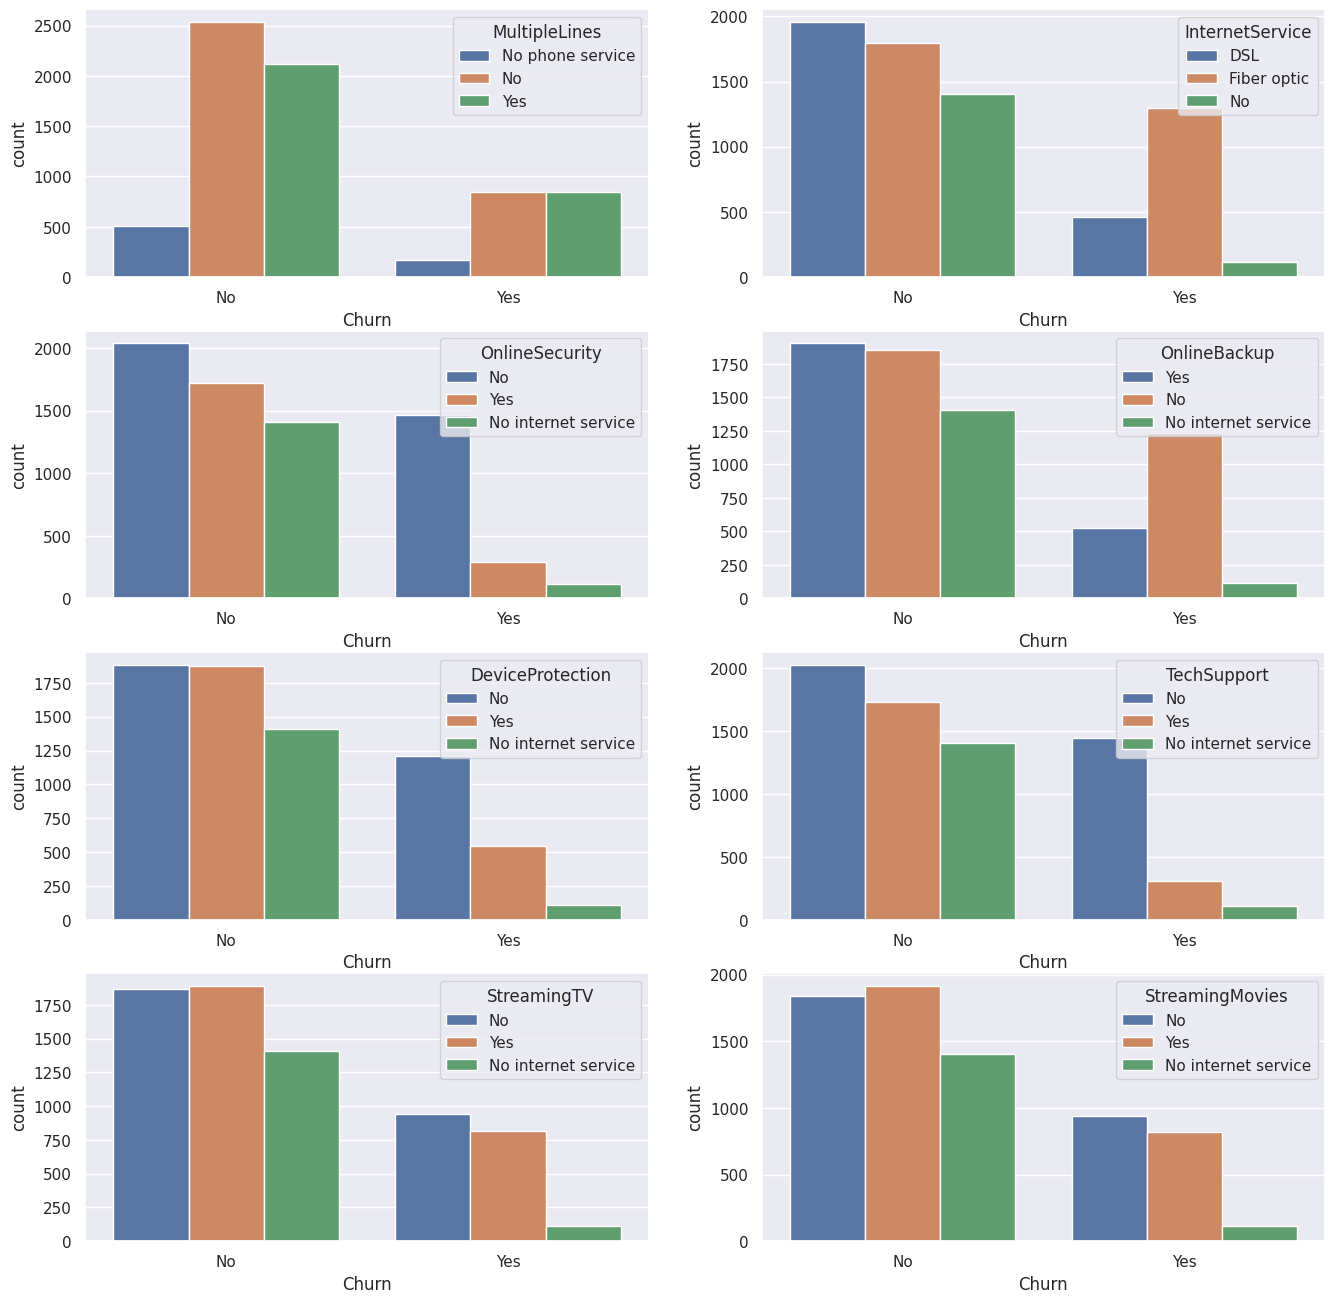

In [15]:
# membuat bar plot pada beberapa variabel kategory
fig,axs=plt.subplots(4,2, figsize=(16,16))
sns.countplot(x='Churn',hue='MultipleLines',data=df,ax=axs[0,0])
sns.countplot(x='Churn',hue='InternetService',data=df,ax=axs[0,1])
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,ax=axs[1,0])
sns.countplot(x='Churn',hue='OnlineBackup',data=df,ax=axs[1,1])
sns.countplot(x='Churn',hue='DeviceProtection',data=df,ax=axs[2,0])
sns.countplot(x='Churn',hue='TechSupport',data=df,ax=axs[2,1])
sns.countplot(x='Churn',hue='StreamingTV',data=df,ax=axs[3,0])
sns.countplot(x='Churn',hue='StreamingMovies',data=df,ax=axs[3,1])
plt.show()

**Insight:**

Berdasarkan plot di atas:
- Multiple Lines: Pelanggan yang tidak melakukan churn didominasi oleh pelanggan yang tidak memiliki banyak saluran (channel). Sementara itu, jumlah pelanggan yang melakukan churn memiliki proporsi yang sama baik yang memiliki channel maupun yang tidak memiliki channel.
- Internet Service: Mayoritas pelanggan yang melakukan churn menggunakan layanan fiber optic. Hal ini dapat menjadi perhatian terkait layanan internet fiber optic.
- Online Security: Mayoritas pelanggan yang melakukan churn adalah yang tidak menggunakan layanan online security. Namun, pelanggan yang tidak melakukan churn juga mayoritas tidak menggunakan online security.
- Tech Support: Mayoritas pelanggan yang melakukan churn tidak memiliki dukungan teknis (tech support). Namun, pelanggan yang tidak melakukan churn juga mayoritas tidak memiliki tech support.
- Online Backup: Mayoritas pelanggan yang melakukan churn tidak menggunakan layanan Online Backup. Namun, pelanggan yang tidak melakukan churn juga mayoritas tidak menggunakan Online Backup.
- Device Protection: Mayoritas pelanggan yang melakukan churn tidak memiliki layanan Device Protection. Namun, pelanggan yang tidak melakukan churn juga mayoritas yang memiliki dan tidak memiliki device protection.
- Streaming TV: Mayoritas pelanggan yang melakukan churn tidak memiliki layanan Streaming TV. Namun, jumlah pelanggan churn yang memiliki Streaming TV juga signifikan.
- Streaming Movie: Mayoritas pelanggan yang melakukan churn tidak memiliki layanan Streaming TV. Namun, jumlah pelanggan churn yang memiliki Streaming Movie juga signifikan.

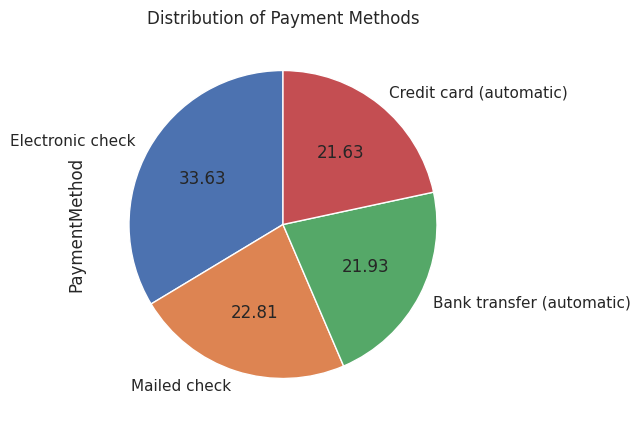

In [16]:
plt.figure(figsize=(5, 5))
df['PaymentMethod'].value_counts().plot(kind='pie', autopct='%.2f',startangle=90)
plt.title('Distribution of Payment Methods')
plt.show()

**Insight**: Mayoritas payment method yang digunakan customer adalah electronic check

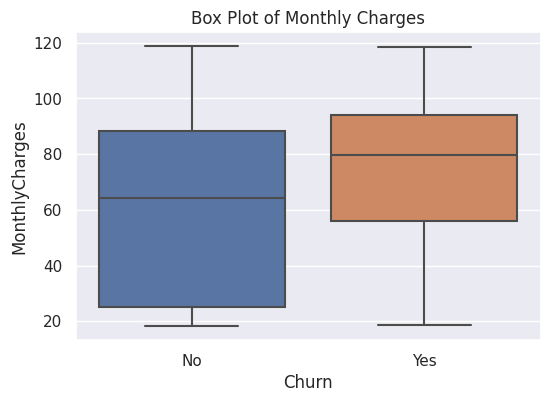

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title('Box Plot of Monthly Charges')
plt.show()

**Insight**: Dilihat dari Box Plot di atas, terlihat bahwa biaya bulanan pelanggan yang melakukan churn cenderung lebih tinggi dibandingkan dengan mereka yang tidak melakukan churn.

# v. Feature Engineering

In [18]:
# Melakukan pergantian nilai pada kolom 'Churn' menjadi integer
df['Churn'].replace({'No':0,'Yes':1},inplace=True)

## Correlation

### 1. Group Demographic info about customers

In [19]:
dem_cus=df[['gender','Partner','Dependents','Churn']]

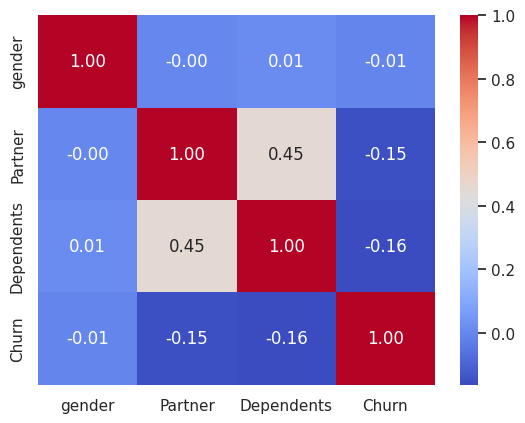

In [20]:
# Melakukan encoding hanya untuk kolom bertipe 'object'
for col in dem_cus.columns:
    if dem_cus[col].dtype == 'object':
        dem_cus[col] = LabelEncoder().fit_transform(dem_cus[col])

# Menghitung korelasi setelah encoding
correlation_demo =dem_cus.corr(method='kendall')
sns.heatmap(correlation_demo, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


Varibel yang memiliki korelasi negatif yang tinggi (di bawah >= - 0.15) dengan Churn:

**"Partner", "Dependents"**


### 2. Group Services



In [21]:
ser=df[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]

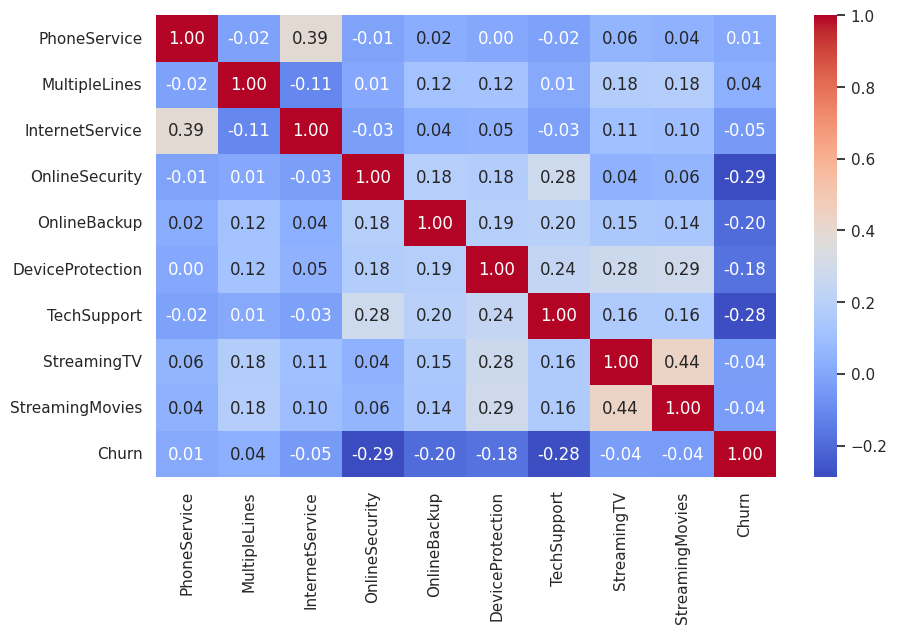

In [22]:
# Melakukan encoding hanya untuk kolom bertipe 'object'
for col in ser.columns:
    if ser[col].dtype == 'object':
        ser[col] = LabelEncoder().fit_transform(ser[col])
plt.figure(figsize=(10, 6))
# Menghitung korelasi setelah encoding
correlation_ser=ser.corr()
sns.heatmap(correlation_ser, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


Varibel yang memiliki korelasi negatif yang tinggi (di bawah >= - 0.15) dengan Churn:

**"OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"**


### 3. Group Account Information Category

In [23]:
acc=df[['Contract','PaperlessBilling','PaymentMethod',"SeniorCitizen",'Churn']]

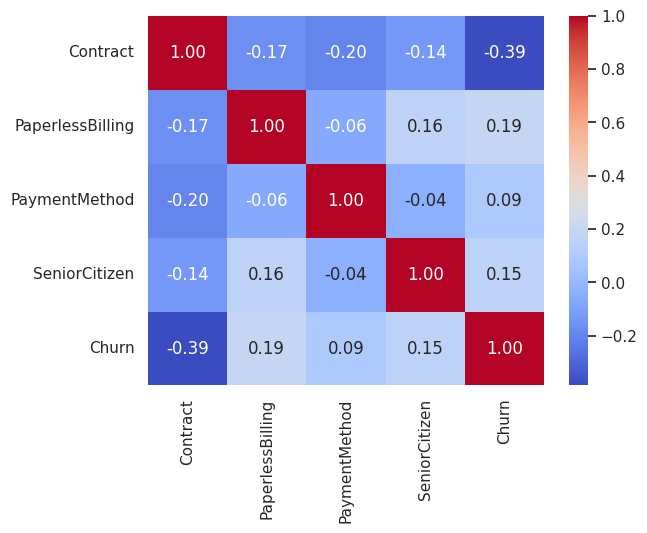

In [24]:
for col in acc.columns:
    if acc[col].dtype == 'object':
        acc[col] = LabelEncoder().fit_transform(acc[col])

# Calculating correlation after encoding
correlation_acc = acc.corr(method='kendall')

# Creating a heatmap for the correlation matrix
sns.heatmap(correlation_acc, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Varibel yang memiliki korelasi positif yang tinggi (di atas >= 0.15) dengan Churn:

**"SeniorCitizen", "PaperlessBilling"**

## 4. Group Account Information Numeric

In [25]:
num_cor=df[['tenure','MonthlyCharges','TotalCharges','Churn']]

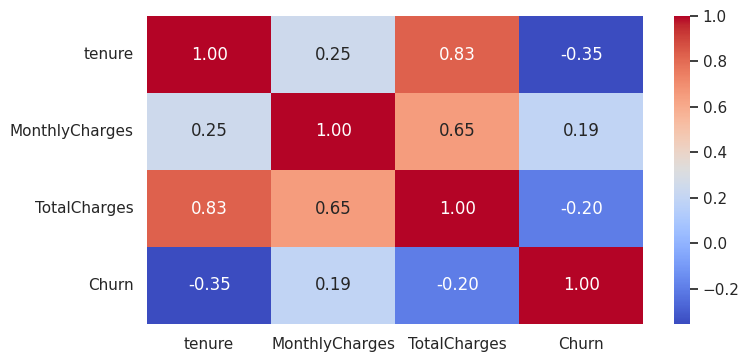

In [26]:
plt.figure(figsize=(8, 4))
correlation =num_cor.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()


Varibel yang memiliki korelasi positif yang tinggi (di atas > 0.15) dengan Churn:

**"Tenure", "MonthlyCharges", "TotalCharges**

### Pengecekan VIF

In [27]:
# definisi vif
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [28]:
df_new=df[['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','MonthlyCharges','tenure','TotalCharges']]
for col in df_new.columns:
        df_new[col] = LabelEncoder().fit_transform(df_new[col])

calc_vif(df_new)


,variables,VIF
0,SeniorCitizen,1.335127
1,Partner,2.799613
2,Dependents,1.901070
3,OnlineSecurity,2.157951
4,OnlineBackup,2.362166
5,DeviceProtection,2.481947
6,TechSupport,2.314342
7,Contract,4.283220
8,PaperlessBilling,2.453259
9,MonthlyCharges,12.937117


Kolom Ttenure dan otalcharges memiliki VIF yang sangat tinggi , maka berpotensi memiliki korelasi yang tinggi terhadap variabel lain. Selanjutnya, akan dilakukan pengahapusan pada kolom Total Charges

In [29]:
df_new.drop('TotalCharges',axis=1,inplace=True)

calc_vif(df_new)

,variables,VIF
0,SeniorCitizen,1.334991
1,Partner,2.797760
2,Dependents,1.900824
3,OnlineSecurity,2.139679
4,OnlineBackup,2.360061
5,DeviceProtection,2.477453
6,TechSupport,2.293761
7,Contract,4.037590
8,PaperlessBilling,2.451868
9,MonthlyCharges,3.952581


Setelah dilakukan penghapusan pada total charges, semua kolom memiliki VIF yang kecil

## Feature Splitting

In [30]:
X = df[['SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','MonthlyCharges','tenure']]
y = df['Churn']

Pemilihan fitur yaitu dengan melihat korelasi yang tinggi terhadap churn (di atas >= 0.15) atau (di bawah <= -0.15)

In [31]:
# splitting menjadi train dan test dengan proporsi data train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5625, 11)
Test Size :  (1407, 11)


## Handling Outlier

In [32]:
def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

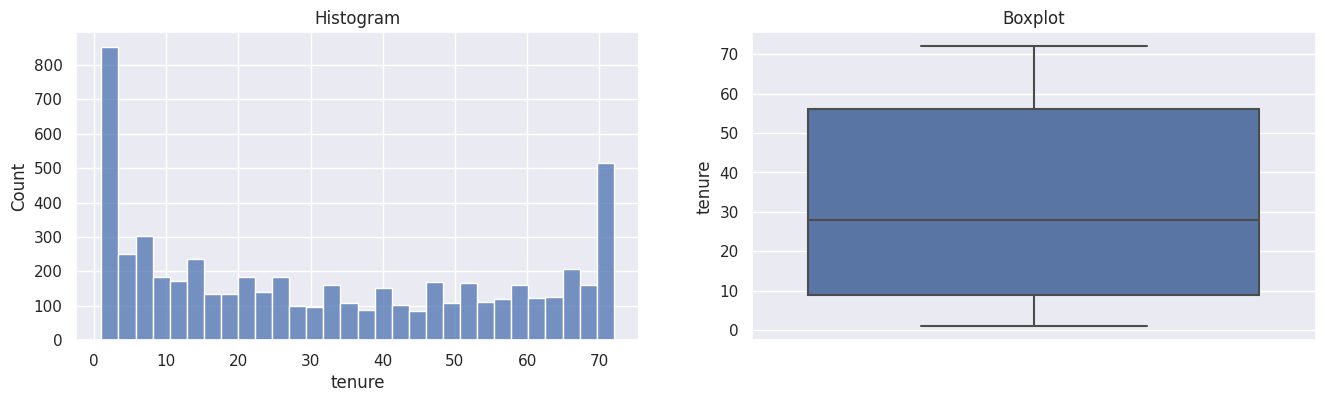


Skewness Value tenure X_train:  0.24528644048098458


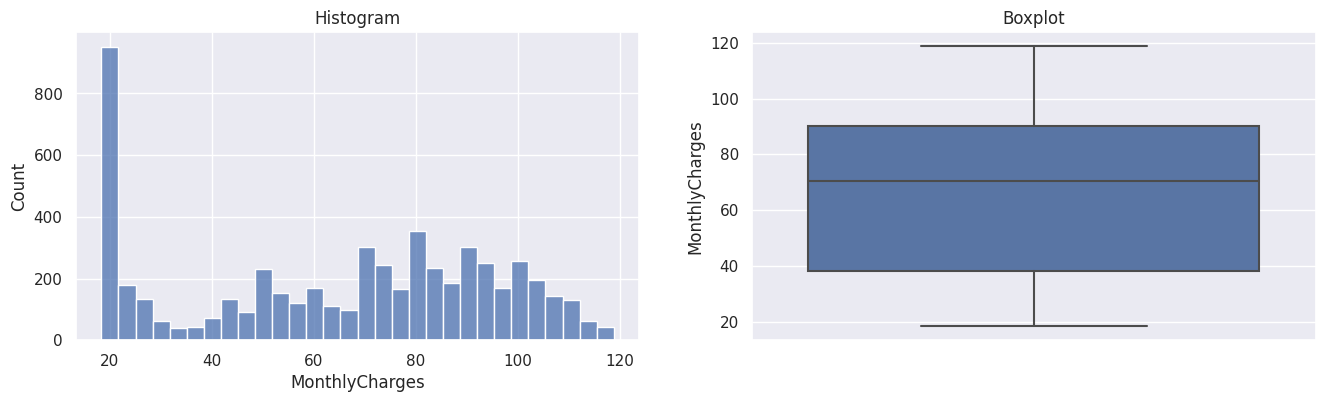


Skewness Value MonthlyCharges X_train:  -0.23876238426178406


In [33]:
# Check distribution of features and outliers using Boxplot

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value tenure X_train: ', X_train['tenure'].skew())

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value MonthlyCharges X_train: ', X_train['MonthlyCharges'].skew())

Tidak ada data outlier, maka tidak dilakukan handling outlier pada data. Karena skew dibawah 0.5 maka normalisasi yang dilakukan adalah standarscaler

In [34]:
cat_col=['Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling']
num_col=['MonthlyCharges','tenure']
ordinal=['SeniorCitizen']

### Scaling dan Encoding

In [35]:
# membuat pipeline yang berisi scaling dan encoding
scaler =StandardScaler()
encoding =OneHotEncoder(handle_unknown='ignore')
preprocess = ColumnTransformer([('cat',encoding,cat_col),
                              ('num',scaler,num_col),
                                ('passthrough', 'passthrough', ordinal)])

preprocess

ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Partner', 'Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'Contract',
                                  'PaperlessBilling']),
                                ('num', StandardScaler(),
                                 ['MonthlyCharges', 'tenure']),
                                ('passthrough', 'passthrough',
                                 ['SeniorCitizen'])])

Variabel kategori yang ada bertiper nominal maka dilakukan encoding dengan one hot ordinal

In [36]:
X_train_pro = preprocess.fit_transform(X_train)

### Handling Imbalance Data

In [37]:
# melakukan under sampling
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42)

X_res, y_res = cc.fit_resample(X_train_pro, y_train)
y_res.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

# Model Definition

In [38]:
# membuat pipeline untuk setiap model
pipe_rf = Pipeline([('rand_f',RandomForestClassifier(n_estimators=100))])
pipe_svm = Pipeline([('svc',SVC())])
pipe_knn = Pipeline([('knn',KNeighborsClassifier())])
pipe_dt = Pipeline([('dt',DecisionTreeClassifier())])
pipe_gbc = Pipeline([('gbc',GradientBoostingClassifier())])

# Model Training

## Baseline

In [39]:
custom_recall= make_scorer(recall_score, pos_label=1)

In [40]:
# melakukan cross validation untuk setiap model
cv_svm_model = cross_val_score(pipe_svm, X_res, y_res, cv=3, scoring=custom_recall)
cv_rf_model = cross_val_score(pipe_rf, X_res, y_res, cv=3, scoring=custom_recall)
cv_knn_model = cross_val_score(pipe_knn, X_res, y_res, cv=3, scoring=custom_recall)
cv_dt_model = cross_val_score(pipe_dt, X_res, y_res, cv=3, scoring=custom_recall)
cv_gbc_model = cross_val_score(pipe_gbc, X_res,y_res, cv=3, scoring=custom_recall)


In [41]:
# cross validation untuk setiap model
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_rf_model,cv_dt_model,cv_gbc_model],['knn_model','svm_model','rf_model','dt_model','gbc_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.75100402 0.78557114 0.76706827]
recall - Mean - Cross Validation :  0.767881143813732
recall - Std - Cross Validation  :  0.014123670979127754
recall - Range of Test-Set       :  0.7537574728346043 - 0.7820048147928597
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.77911647 0.7995992  0.79317269]
recall - Mean - Cross Validation :  0.7906294516744333
recall - Std - Cross Validation  :  0.008553230649078097
recall - Range of Test-Set       :  0.7820762210253552 - 0.7991826823235114
--------------------------------------------------
rf_model
recall - All - Cross Validation  :  [0.75903614 0.76553106 0.78514056]
recall - Mean - Cross Validation :  0.7699025896505193
recall - Std - Cross Validation  :  0.011096331080318702
recall - Range of Test-Set       :  0.7588062585702006 - 0.780998920730838
--------------------------------------------------
dt_model
recall - All - Cross Validation  :

Dari beberapa model di atas terbaik adalah gradient boosting

## Hyperparameter

In [55]:
# Mendefinisikan parameter
parameters = {
    'gb__n_estimators': stats.randint(30, 101),
    'gb__max_depth': stats.randint(3, 8),
    'gb__learning_rate': stats.uniform(0.01, 0.2 - 0.01),
    'gb__subsample': [0.8, 1.0],
    'gb__min_samples_split': stats.randint(2, 11),
    'gb__min_samples_leaf': stats.randint(1, 5),
    'gb__max_features': ['auto', 'sqrt', 'log2']
}

In [70]:
gb_classifier = GradientBoostingClassifier()

# Define the parameter distribution for RandomizedSearchCV
parameters = {
    'gb__n_estimators': stats.randint(30, 101),
    'gb__max_depth': stats.randint(3, 8),
    'gb__learning_rate': stats.uniform(0.01, 0.2 - 0.01),
    'gb__subsample': [0.8, 1.0],
    'gb__min_samples_split': stats.randint(2, 11),
    'gb__min_samples_leaf': stats.randint(1, 5),
    'gb__max_features': ['auto', 'sqrt', 'log2']
}

# Create the pipeline with GradientBoostingClassifier
final_pipe = Pipeline([('gb', gb_classifier)])

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    final_pipe,
    param_distributions=parameters,
    n_iter=10,
    scoring=custom_recall,
    cv=3,
    n_jobs=-1
)

# Fit the random search to the data
random_search.fit(X_res, y_res)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the results
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'gb__learning_rate': 0.15769011667692084, 'gb__max_depth': 3, 'gb__max_features': 'sqrt', 'gb__min_samples_leaf': 3, 'gb__min_samples_split': 3, 'gb__n_estimators': 56, 'gb__subsample': 0.8}
Best Estimator: Pipeline(steps=[('gb',
                 GradientBoostingClassifier(learning_rate=0.15769011667692084,
                                            max_features='sqrt',
                                            min_samples_leaf=3,
                                            min_samples_split=3,
                                            n_estimators=56, subsample=0.8))])


In [71]:
random_search.best_score_

0.8354352614197605

In [72]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gb__learning_rate,param_gb__max_depth,param_gb__max_features,param_gb__min_samples_leaf,param_gb__min_samples_split,param_gb__n_estimators,param_gb__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.116520,0.002610,0.006346,0.001102,0.134992,4,sqrt,3,4,33,0.8,"{'gb__learning_rate': 0.13499180109032283, 'gb...",0.809237,0.835671,0.801205,0.815371,0.014724,8
1,0.440886,0.018254,0.008469,0.000222,0.191342,7,log2,3,4,63,0.8,"{'gb__learning_rate': 0.19134201038612064, 'gb...",0.805221,0.809619,0.815261,0.810034,0.004109,10
2,0.314238,0.009816,0.008475,0.000990,0.114457,4,sqrt,4,4,99,1.0,"{'gb__learning_rate': 0.11445672816470333, 'gb...",0.821285,0.845691,0.825301,0.830759,0.010685,2
3,0.154751,0.001963,0.005740,0.000145,0.15769,3,sqrt,3,3,56,0.8,"{'gb__learning_rate': 0.15769011667692084, 'gb...",0.831325,0.859719,0.815261,0.835435,0.018381,1
4,0.174771,0.002382,0.008211,0.002904,0.025904,6,sqrt,4,7,31,1.0,"{'gb__learning_rate': 0.025903724488281966, 'g...",0.831325,0.833667,0.807229,0.824074,0.011949,6
5,0.421820,0.004593,0.008914,0.000671,0.158687,6,sqrt,1,3,74,0.8,"{'gb__learning_rate': 0.1586868585119393, 'gb_...",0.795181,0.817635,0.823293,0.812036,0.012141,9
6,0.220699,0.002958,0.006727,0.000119,0.079684,3,log2,2,8,90,1.0,"{'gb__learning_rate': 0.0796835590462437, 'gb_...",0.827309,0.849699,0.805221,0.827410,0.018158,5
7,0.391710,0.013168,0.008468,0.000131,0.084391,5,log2,2,9,94,0.8,"{'gb__learning_rate': 0.08439144452316268, 'gb...",0.827309,0.845691,0.815261,0.829421,0.012513,4
8,0.362459,0.012251,0.007899,0.000063,0.073312,5,log2,1,2,82,0.8,"{'gb__learning_rate': 0.07331208277933139, 'gb...",0.807229,0.845691,0.817269,0.823396,0.016289,7
9,0.290511,0.035105,0.006784,0.001185,0.056498,5,log2,1,9,76,0.8,"{'gb__learning_rate': 0.05649759992903076, 'gb...",0.827309,0.849699,0.815261,0.830757,0.014269,3


Karena recall score setelah dilakukan hyperparameter tuning lebih baik, maka yang akan digunakan adalah model gradient boosting yang sudah dilakukan hyperparameter

# Model Evaluation

recall- Train Set   :  0.8528428093645485 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1495
           1       0.79      0.85      0.82      1495

    accuracy                           0.81      2990
   macro avg       0.82      0.81      0.81      2990
weighted avg       0.82      0.81      0.81      2990
 

Confusion Matrix      :


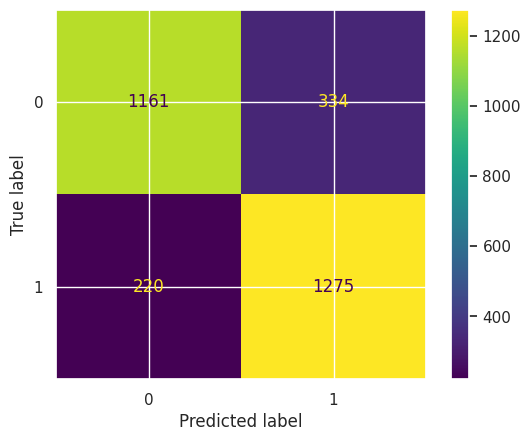

In [74]:
# Check Performance Model against Train-Set

y_pred_train = best_estimator.predict(X_res)

print('recall- Train Set   : ', recall_score(y_res, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_res, y_pred_train), '\n')
print('Confusion Matrix      :')
cm = confusion_matrix(y_res, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [75]:
X_test_pro = preprocess.transform(X_test)

recall - Test Set   :  0.8475935828877005 

Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.70      0.79      1033
           1       0.50      0.85      0.63       374

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.81      0.74      0.75      1407
 

Confusion Matrix      : 


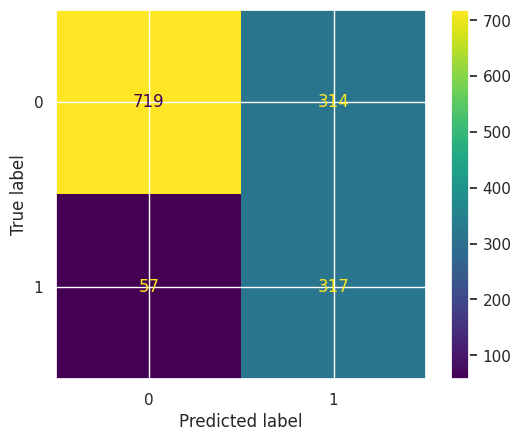

In [76]:
# Check Performance Model against Test-Set

y_pred_test = best_estimator.predict(X_test_pro)

print('recall - Test Set   : ', recall_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : ')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

Dengan melihat skor Recall pada data train sebesar 0.85 dan pada data test sebesar 0.84, kita dapat menyimpulkan bahwa model cenderung dapat mengidentifikasi dengan baik pelanggan yang benar-benar akan melakukan churn. Fokus saat ini pada Recall  karena kita ingin meminimalkan risiko pelanggan yang sebenarnya akan churn (false negative) namun diprediksi tidak churn. Hal ini berdampak buruk pada perusahaan. Meskipun demikian, tetap diperlukan evaluasi lebih lanjut dan penyesuaian model untuk meningkatkan performa dan menjaga keseimbangan antara precision dan recall. Presisi sebesar 0.51 bagi yang tidak melakukan churn tetapi diprediksi sebagai churn menunjukkan bahwa model memiliki tingkat kesalahan yang signifikan dalam mengidentifikasi pelanggan yang sebenarnya tidak akan melakukan churn. Nilai presisi yang rendah pada kondisi ini dapat mengindikasikan overfitting.

# Model Saving

In [49]:
# membuat gabungan pipeline preprocess dengan model terbaik
final_model=Pipeline([('proses',preprocess),('model',best_estimator)])

In [50]:
final_model

Pipeline(steps=[('proses',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('num', StandardScaler(),
                                                  ['MonthlyCharges', 'tenure']),
                                                 ('passthrough', 'passthrough',
                                                  ['SeniorCitizen'])])),
                ('model',
                 Pipeline(steps=[('gb',
                                  GradientBoostingClassifier(learning_rate=0.15328970037017148,
                                                             max_depth=5,
                                                             max_features='auto',
                                                             min_samples_leaf=4,
                                                             min_samples_split=3,
                                                             n_estimators=89,
                                                             subsample=0.8))]))])

In [51]:
#Menyimpan fungsi ke format .pkl
with open('final_model.pkl', 'wb') as file_1:
  pickle.dump(final_model, file_1)

# Pengambilan Keputusan

Dengan skor Recall pada data pelatihan sebesar 0.85 dan pada data uji sebesar 0.84, model terlihat mampu mengidentifikasi pelanggan yang benar-benar akan melakukan churn. Pemilihan fokus pada Recall merupakan langkah yang tepat untuk meminimalkan risiko kesalahan prediksi yang dapat berdampak buruk pada perusahaan. Meskipun Recall memiliki performa yang baik, presisi sebesar 0.51 untuk kelas yang seharusnya tidak melakukan churn namun diprediksi sebagai churn menunjukkan tingkat kesalahan yang signifikan. Oleh karena itu, diperlukan evaluasi lebih lanjut dan penyesuaian model untuk meningkatkan performa dan menjaga keseimbangan antara precision dan recall. Selain itu, untuk pengembangan model berikutnya, fokus utama sebaiknya diletakkan pada skor F1, karena kesalahan prediksi di mana pelanggan seharusnya tidak churn namun diprediksi sebagai churn juga dapat berdampak pada hilangnya biaya bagi perusahaan.

fitur yang digunakan ke dalam model adalah
'SeniorCitizen','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','MonthlyCharges','tenure'

# Conceptual Problem

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

**Jelaskan latar belakang adanya bagging dan cara kerja bagging !**

Latar Belakang:

Bagging adalah sebuah teknik ensemble learning yang bertujuan untuk meningkatkan performa model dengan menggabungkan prediksi dari beberapa model yang mungkin bervariasi atau memiliki tingkat keakuratan yang rendah.
Ketika kita melakukan training sebuah model, hasil prediksi dan parameter modelnya tergantung pada ukuran data dan komposisi data yang digunakan pada training. Pada beberapa training bisa terjadi overfitting, dimana hasil prediksi dan model akhir berbeda jauh. Pada kasus ini, parameter model variance dan prediksi berbeda jauh. Dengan teknik bagging ini dapat digunakan untuk mengurangi model variance dan membuat prediksi lebih independen terhadap noise.

Cara kerja bagging:

Bagging (Bootstrap Aggregating) bekerja dengan cara membagi dataset train menjadi subset acak menggunakan teknik bootstrap sampling. Sejumlah besar model, biasanya model yang sama, dibangun secara independen pada setiap subset. Setelah itu, model-model tersebut digunakan untuk membuat prediksi pada data test, dan hasil prediksi mereka diagregasi untuk menghasilkan prediksi akhir. Kunci dari bagging adalah mengurangi variabilitas prediksi dengan memanfaatkan variasi dalam subset bootstrap, sehingga memberikan prediksi yang lebih stabil dan akurat.



Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Random Forest dan Gradient Boosting Classifier adalah dua algoritma ensemble learning yang berbeda dalam cara kerjanya. Random Forest membangun sejumlah besar pohon keputusan secara independen dengan teknik bootstrap sampling pada data dan feature bagging pada fitur. Prediksi akhir diambil berdasarkan rata-rata prediksi dari semua pohon. Gradient Boosting membangun pohon keputusan secara sejalan, fokus pada mengoreksi kesalahan prediksi sebelumnya dengan memberikan bobot lebih tinggi pada data yang salah klasifikasi.



Jelaskan apa yang dimaksud dengan Cross Validation !

Cross-validation adalah suatu teknik evaluasi kinerja model pada data yang digunakan untuk melatih model. Tujuannya adalah untuk mendapatkan perkiraan yang lebih akurat tentang kemampuan model untuk generalisasi pada data yang belum pernah dilihat sebelumnya.

Cross-validation membantu mengatasi masalah overfitting atau kesalahan yang disebabkan oleh pembagian tertentu dari data latih. Dengan menggunakan cross-validation, kita dapat lebih percaya diri dalam mengukur sejauh mana model kita dapat melakukan generalisasi pada data baru yang belum pernah dilihat sebelumnya.